# Introduction

Notebook para avaliação de performance/treinamentos de algoritmos de NAS.

* Random
* Evolution
* Reinforcement Learning
* Reinforcement Learning + Pred Accuracy (Hybrid Model)

# Import Libraries 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Plot Data Function

In [2]:
def __smooth_data(df):
    df = df[['train_accuracy','val_acc','test_acc','pred_acc']]
    smoothed_df = df.rolling(window=100).mean()
    return smoothed_df


def __load_data(ss_indicator, dataset_name, max_train_hours):
    evol_df      = pd.read_csv(f'./data/{ss_indicator}/evolution_{max_train_hours}h_{dataset_name}.csv').sort_values(by='id')
    rand_df      = pd.read_csv(f'./data/{ss_indicator}/random_{max_train_hours}h_{dataset_name}.csv').sort_values(by='id')
    rl_df        = pd.read_csv(f'./data/{ss_indicator}/rl_{max_train_hours}h_{dataset_name}.csv').sort_values(by='id')
    rl_hybrid_df = pd.read_csv(f'./data/pred_acc/{ss_indicator}/rl_{max_train_hours}h_{dataset_name}.csv').sort_values(by='id') 
    return evol_df,rand_df,rl_df,rl_hybrid_df



def __make_subplot(ax, mth, list_smoothed_dfs, metric_name, split_name):
    colors = ['blue','green','red','purple']
    labels = ['Evolution','Random','RL','RL_Hybrid']
    
    for df,c in zip(list_smoothed_dfs,colors):
        ax.plot(range(0,len(df)), df[metric_name], color=c)
    
    ymin = int(np.min([np.min(df[metric_name]) for df in list_smoothed_dfs])) - 5
    ymax = int(np.max([np.max(df[metric_name]) for df in list_smoothed_dfs])) + 5
    
    ax.set_ylim(ymin,ymax)
    ax.legend(labels=labels, loc='lower center')
    ax.set_title(f'{metric_name.capitalize()} accuracy')
    ax.set_ylabel('Percentual Accuracy (Moving Average - 100 epochs)')
    ax.set_xlabel('Epoch')
    ax.set_title(f'Max Traning Hours: {mth}h - Split: {split_name.upper()}')
    ax.grid()
    
    return ax



def plot_smoothed_tcurves(ss_indicator, dataset_name):
    mths = [10]
    splits = ['train','validation','test']
    metrics = ['train_accuracy','val_acc','test_acc','pred_acc']
    
    fig_n_rows = len(mths)
    fig_n_cols = len(splits)
    
    fig,axes = plt.subplots(fig_n_rows, fig_n_cols, figsize=(25,20))
    fig.suptitle(f'{dataset_name.upper()}')
    
    for i,mth in enumerate(mths):
        for j,(mt_name,sp_name) in enumerate(zip(metrics,splits)):
            list_dfs = __load_data(ss_indicator, dataset_name, mth)
            list_smoothed_dfs = [__smooth_data(df) for df in list_dfs] 
            __make_subplot(axes[i,j], mth, list_smoothed_dfs, mt_name, sp_name)

    plt.show()     
    
    
# def log_neptune(dataset_name):
#     mths = [50,100,200]
#     splits = ['train','validation','test']
#     metrics = ['train_accuracy','val_acc','test_acc']
    
#     for i,mth in enumerate(mths):
#         for j,(mt_name,sp_name) in enumerate(zip(metrics,splits)):
#             list_dfs = __load_data(dataset_name, mth)
#             list_smoothed_dfs = [__smooth_data(df) for df in list_dfs]
            

# Plot

## SSS - Size Search Space

### Cifar10

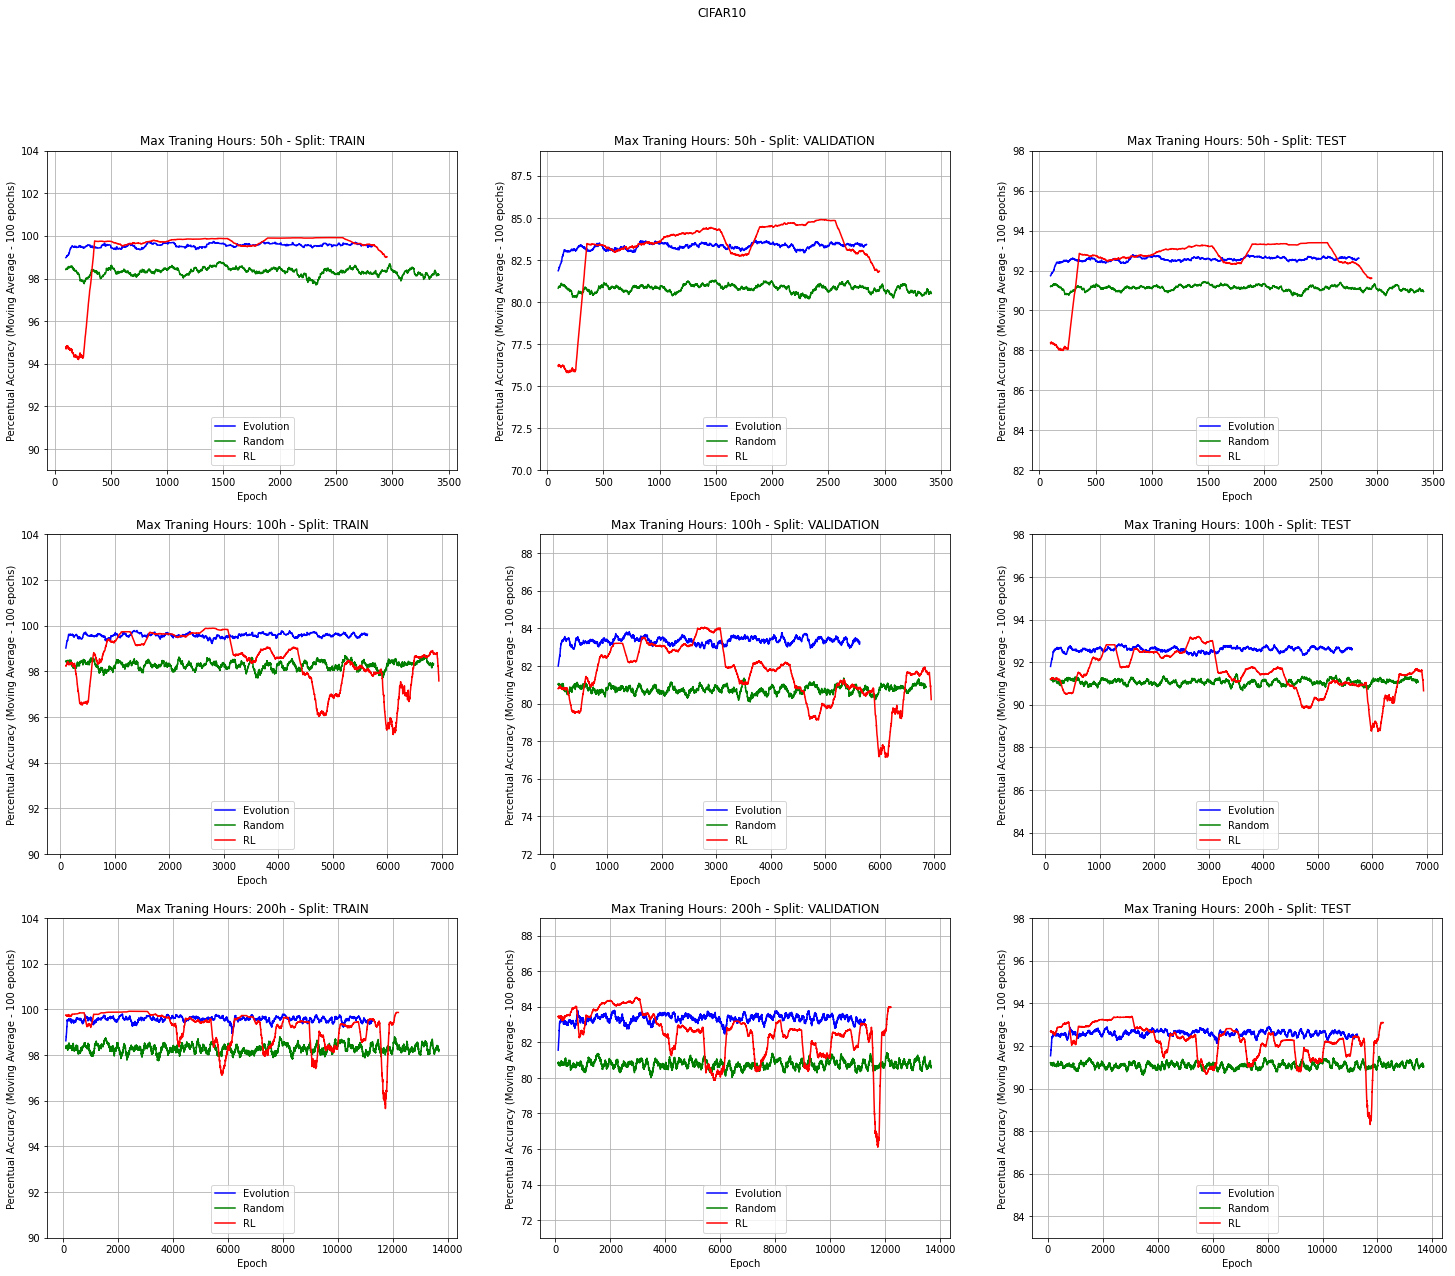

In [3]:
plot_smoothed_tcurves(ss_indicator='sss', dataset_name='cifar10')

### Cifar100

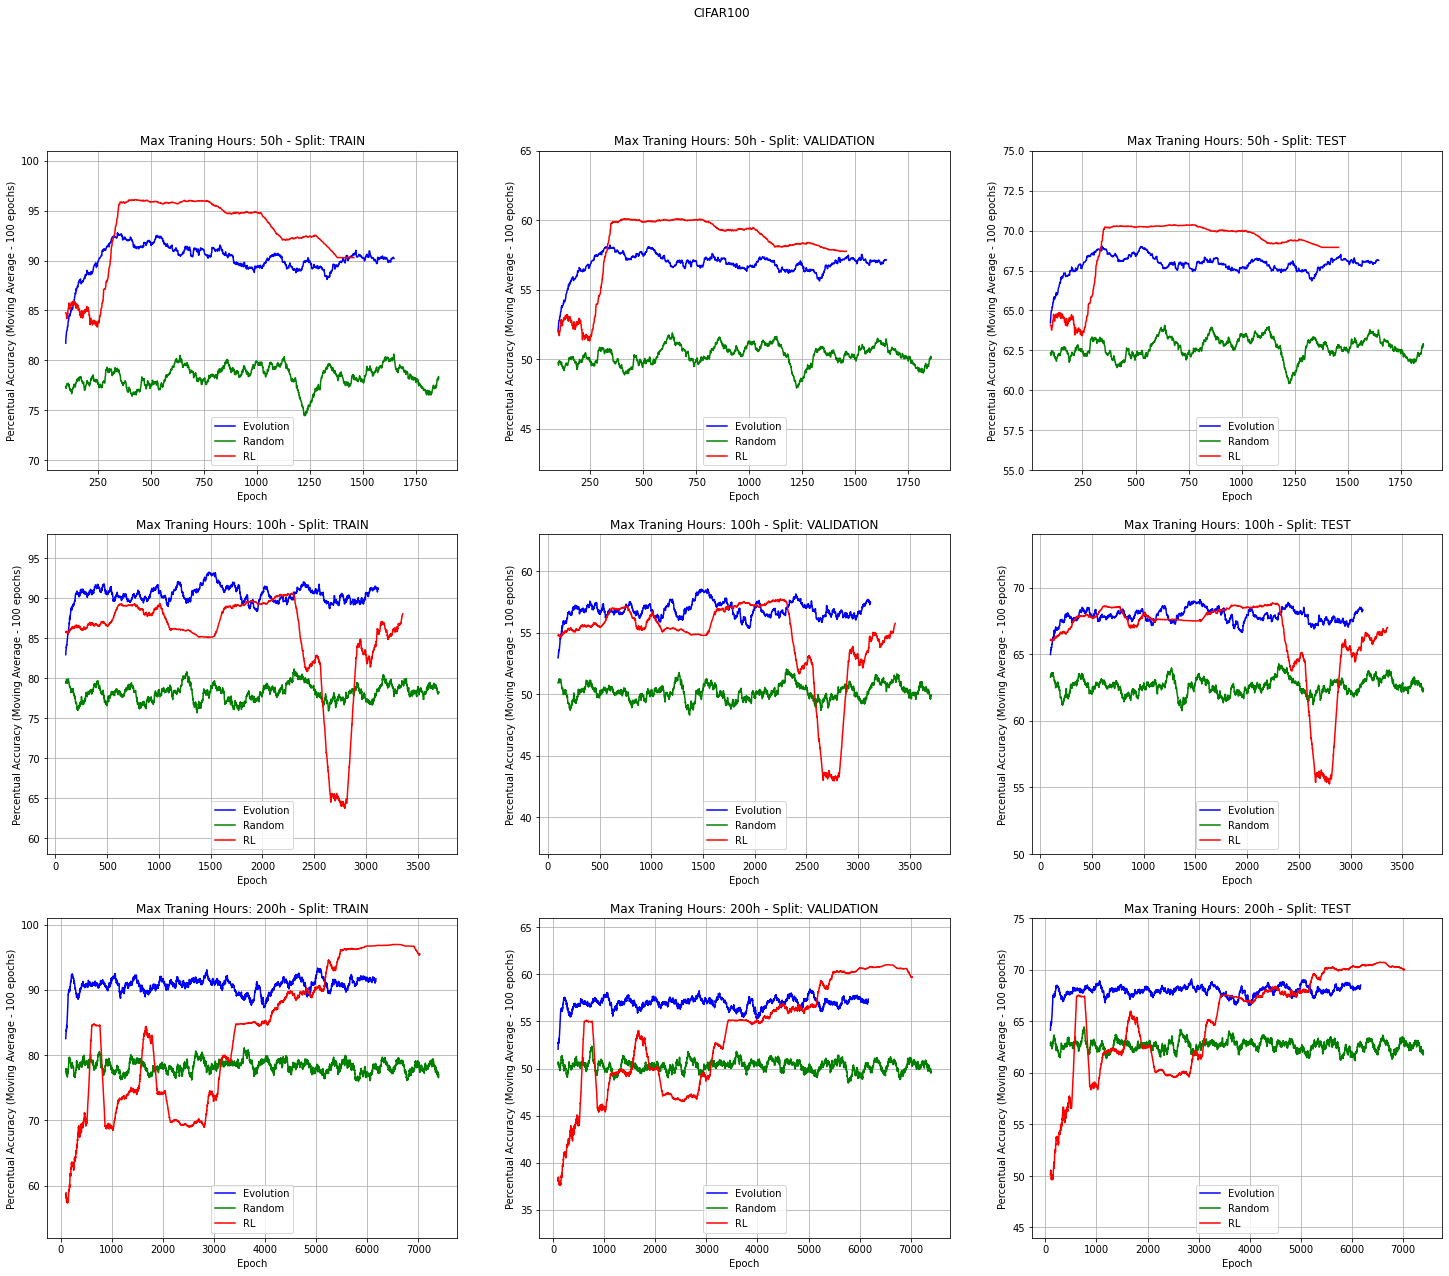

In [6]:
plot_smoothed_tcurves(ss_indicator='sss', dataset_name='cifar100')

### ImageNet16-120

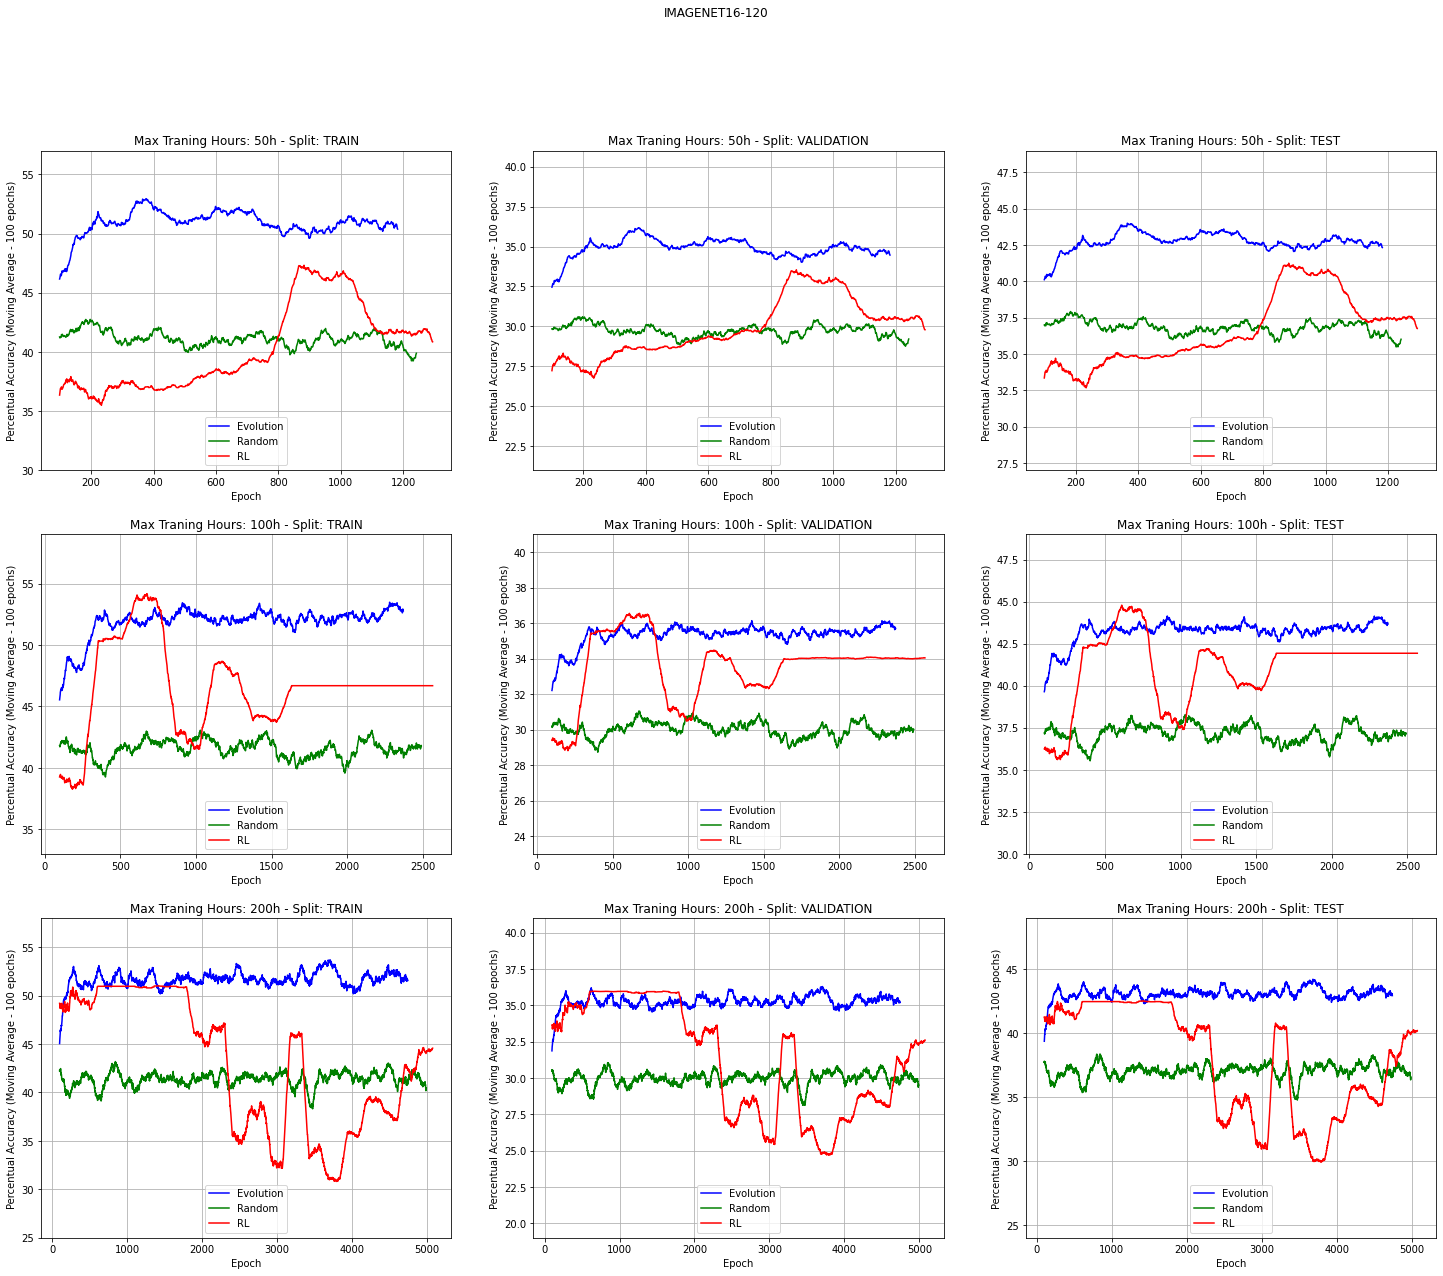

In [7]:
plot_smoothed_tcurves(ss_indicator='sss', dataset_name='ImageNet16-120')

## TSS - Topology Search Space

### Cifar10

FileNotFoundError: [Errno 2] File ./data/pred_acc/tss/rl_10h_cifar10.csv does not exist: './data/pred_acc/tss/rl_10h_cifar10.csv'

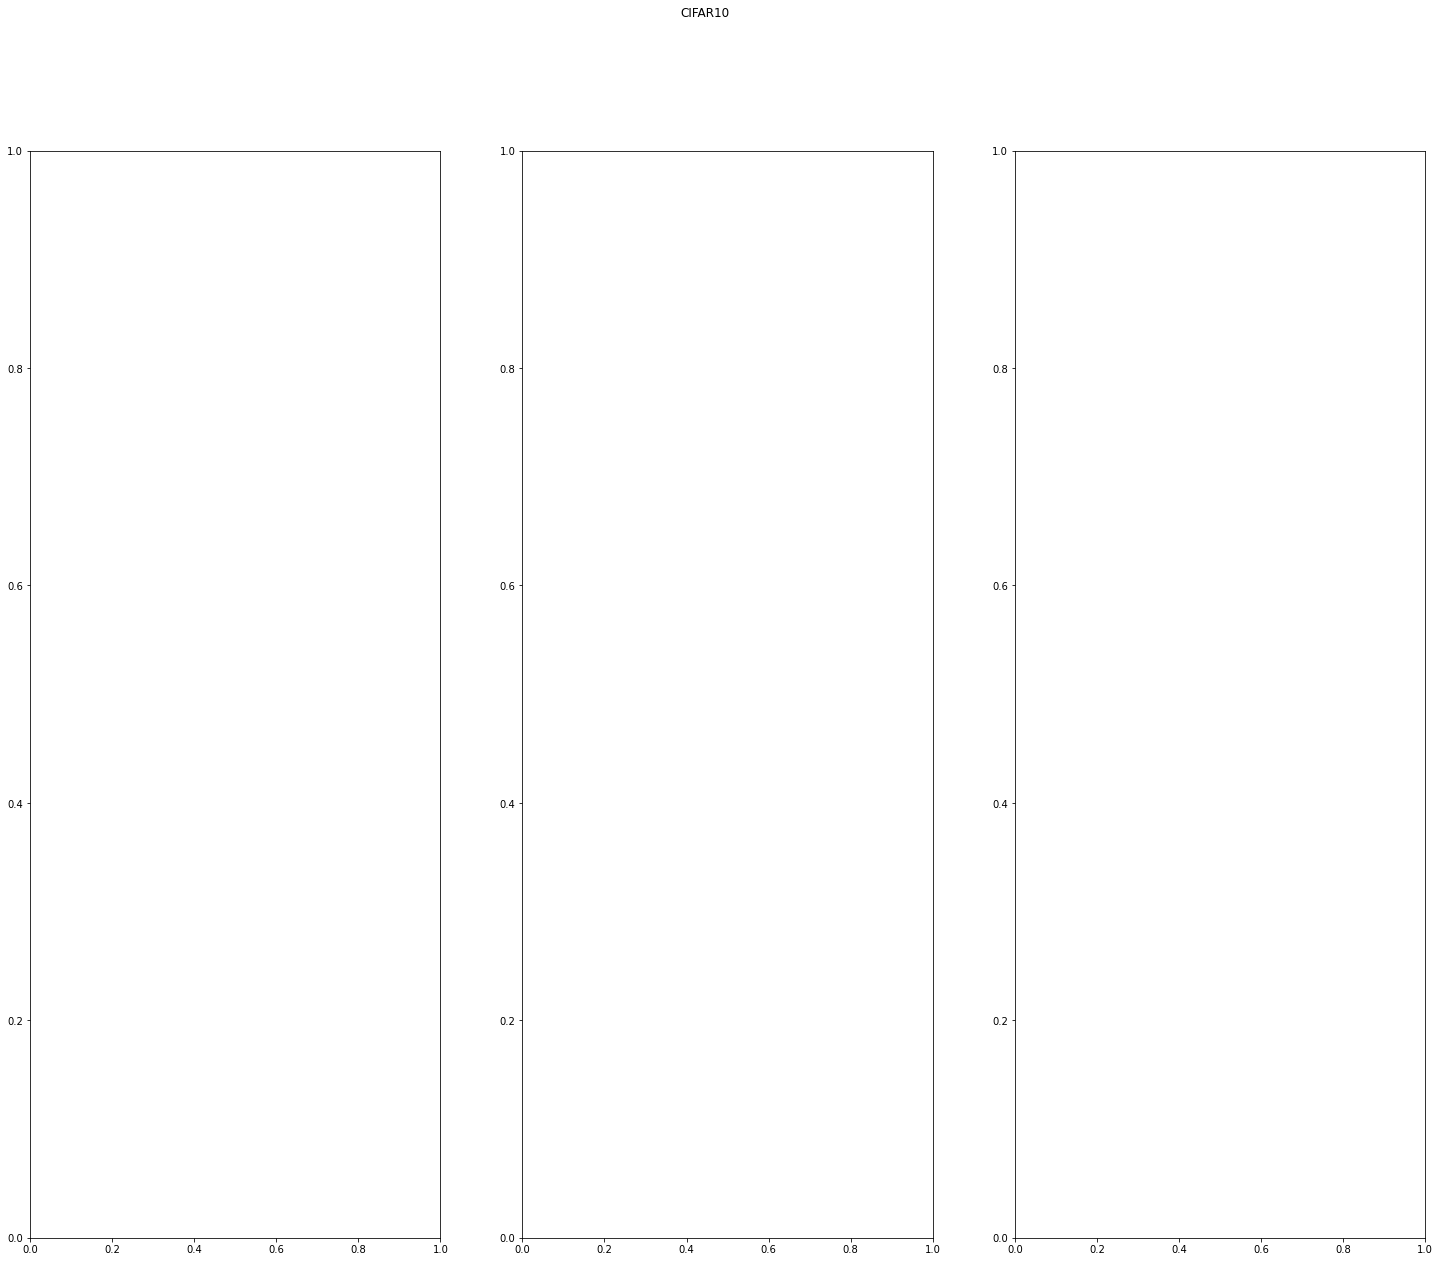

In [3]:
plot_smoothed_tcurves(ss_indicator='tss', dataset_name='cifar10')

### Cifar100

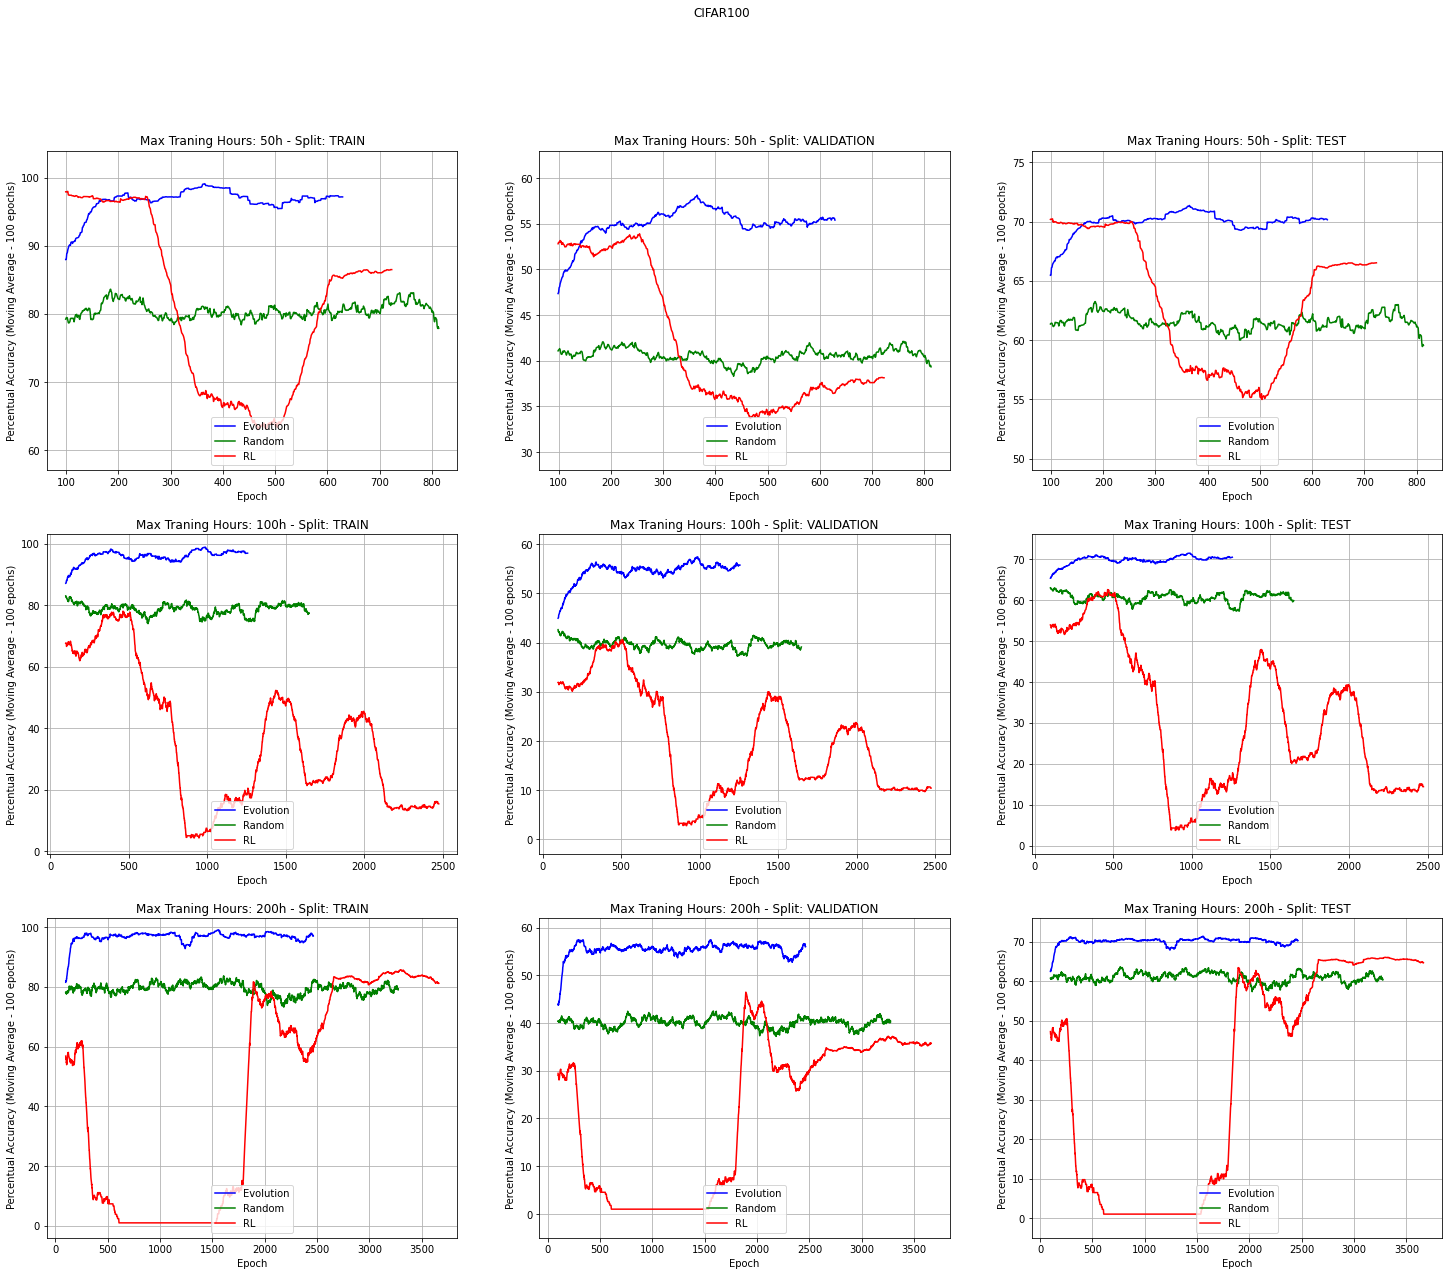

In [9]:
plot_smoothed_tcurves(ss_indicator='tss', dataset_name='cifar100')

### ImageNet16-120

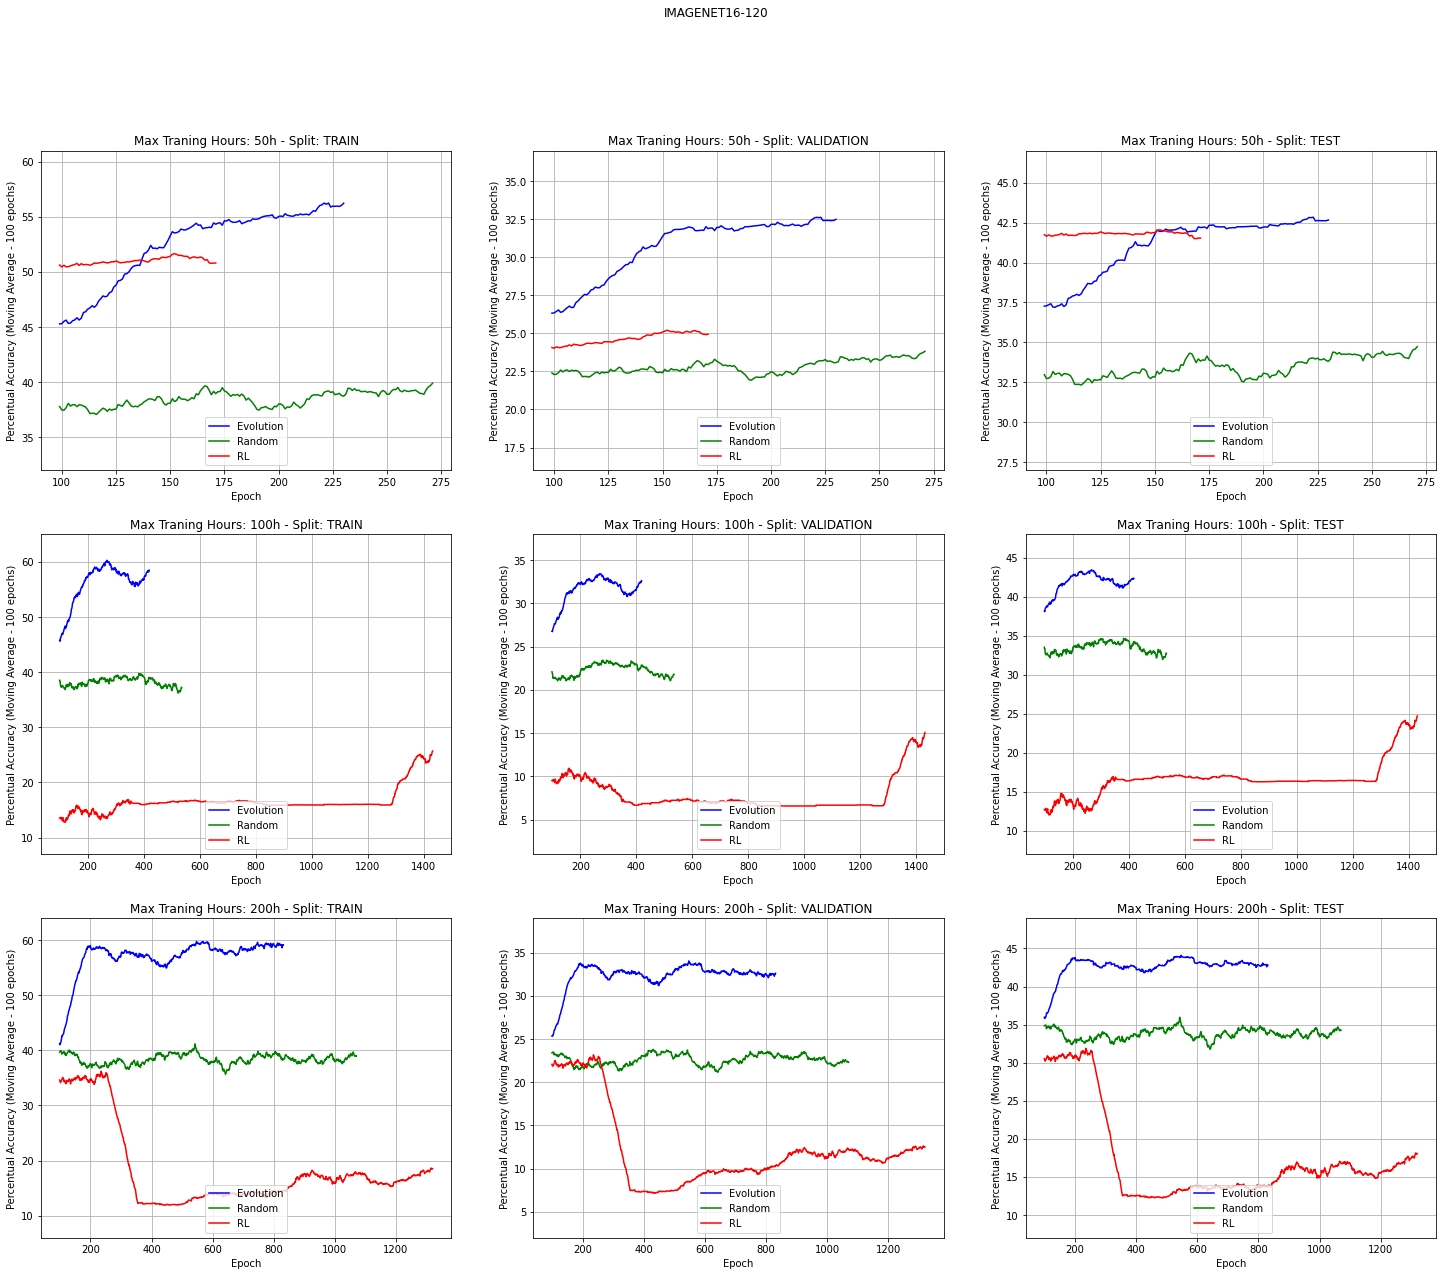

In [10]:
plot_smoothed_tcurves(ss_indicator='tss', dataset_name='ImageNet16-120')